# Calcul des probabilités par énumération exhaustive

In [2]:
import itertools
import random

## 3 Exercices pratiques

### 3.1 4-21

In [37]:
def proba_suite():
    issues = list(itertools.product([1, 2, 3, 4, 5, 6], repeat=3))
    return sum(1 for x in issues if sorted(x)[1] == sorted(x)[0] + 1 and sorted(x)[2] == sorted(x)[1] + 1) / len(issues)

In [38]:
print(proba_suite())

0.1111111111111111


In [39]:
def proba_fiche():
    issues = list(itertools.product([1,2,3,4,5,6],repeat = 3))
    return sum(1 for x in sorted(issues) if sorted(x)[0] == 1 and sorted(x)[1] == 1 ) / len(issues)

In [40]:
proba_fiche()

0.07407407407407407

### 3.2 Ouverture au 5000

In [34]:
def proba_ouverture_5k(mini: int):
    issues = list(itertools.product([1, 2, 3, 4, 5, 6], repeat=5))
    points = [0 + 100 * issue.count(1) + 50 * issue.count(5) for issue in issues]
    return sum(1 for i in range(len(points)) if points[i] >= mini) / len(points)

In [35]:
proba_ouverture_5k(350)

0.016203703703703703

In [36]:
proba_ouverture_5k(250)

0.125

### 3.3 Chapeaux dérangés

In [48]:
def chapeaux(n: int):
    issues = list(itertools.permutations([i for i in range(n)]))
    return sum(1 for issue in issues if all(issue[i] != i for i in range(n))) / len(issues)

In [50]:
print(chapeaux(2))
print(chapeaux(3))
print(chapeaux(4))
print(chapeaux(5))
print(chapeaux(6))

0.5
0.3333333333333333
0.375
0.36666666666666664
0.3680555555555556


[0.5, 0.3333333333333333, 0.375, 0.36666666666666664, 0.3680555555555556, 0.3678571428571429, 0.36788194444444444, 0.36787918871252206]


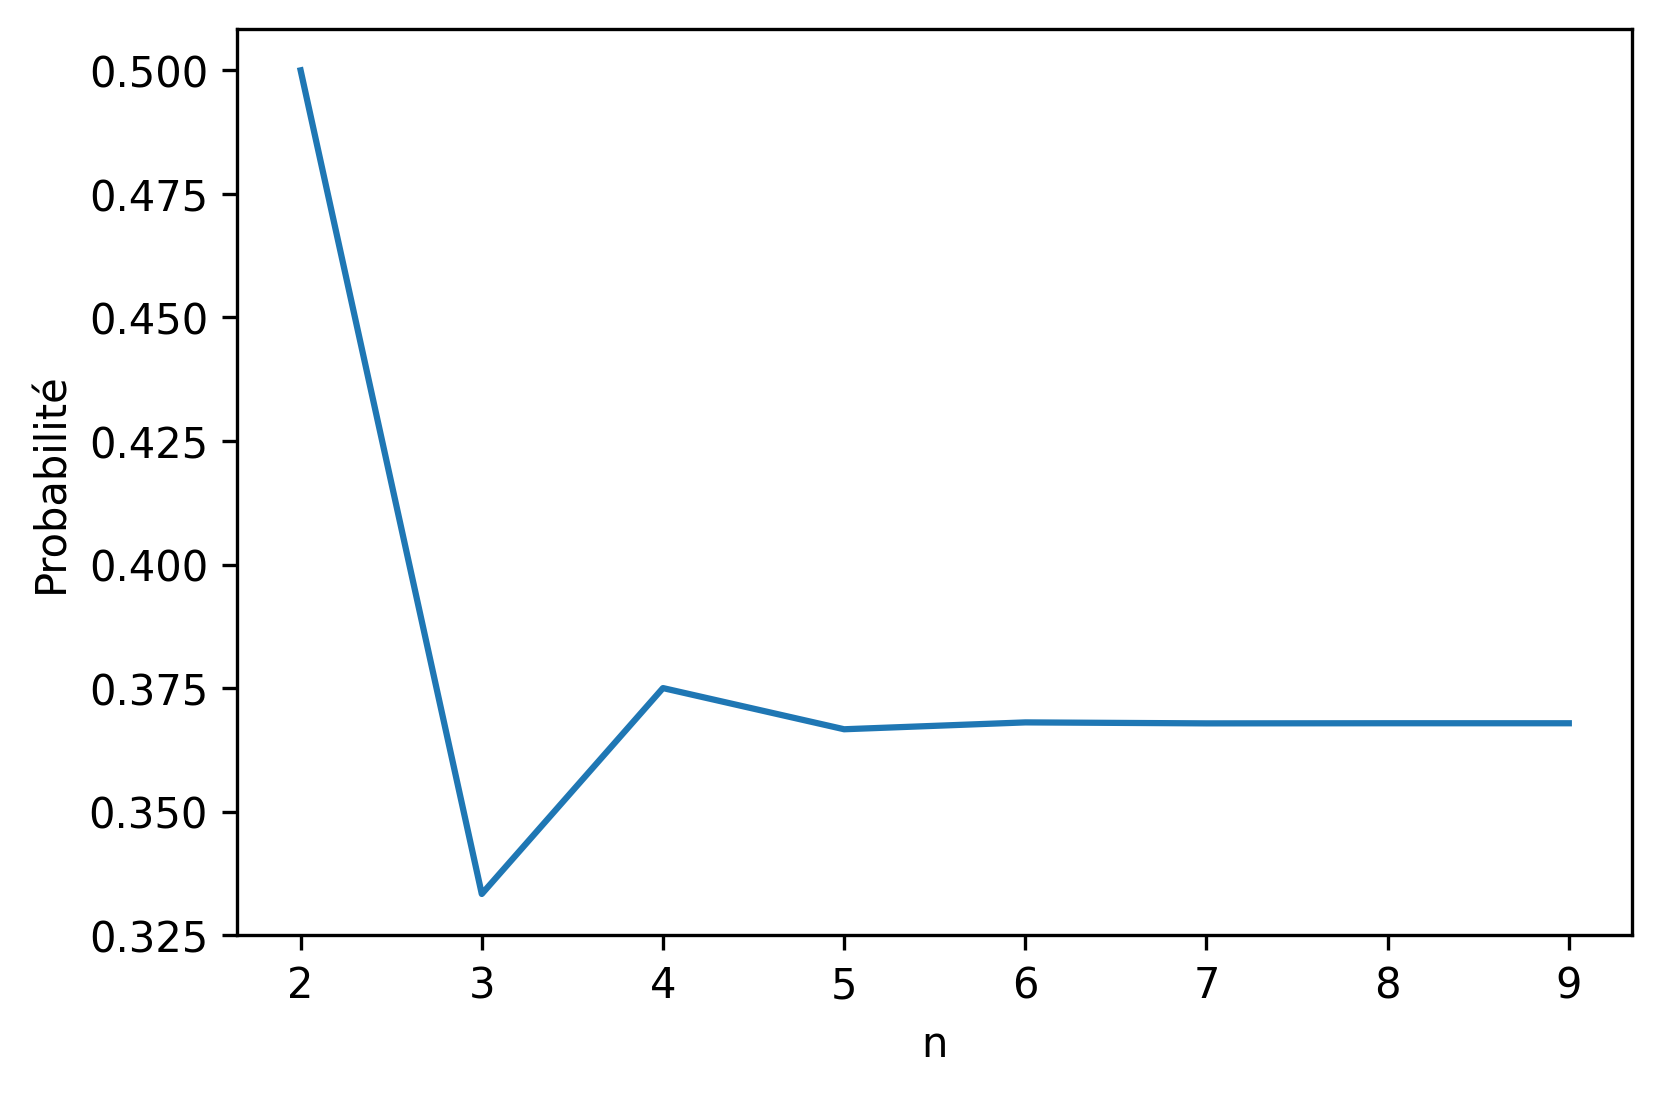

In [63]:
import matplotlib
import matplotlib.pyplot as plt
abscisses = range(2,10)
ordonnees = [chapeaux(x) for x in abscisses]
print(ordonnees)
plt.figure(dpi=300)
plt.plot(abscisses,ordonnees)
plt.xlabel("n")
plt.ylabel("Probabilité")
plt.show()

## 4 Digressions (bonus)

### 4.2 Générateurs

In [3]:
import time, sys
l1 = itertools.permutations([0,1,2,3,4,5,6,7,8,9])
l2 = list(itertools.permutations([0,1,2,3,4,5,6,7,8,9]))
print(sys.getsizeof(l1))
print(sys.getsizeof(l2))
def fun1():
  l1 = itertools.permutations([0,1,2,3,4,5,6,7,8,9])
  for i in l1 :
    None
def fun2():
  l2 = list(itertools.permutations([0,1,2,3,3,4,5,6,7,8,9]))
  for i in l2:
    None
start_time = time.time()
fun1()
print(time.time()-start_time)
start_time = time.time()
fun2()
print(time.time()-start_time)

240
30140776
0.15465188026428223
8.349126100540161


On peut voir une première différence liée à l'utilisation de la fonction ```list()```, qui donne une liste qui prend beaucoup plus de place en mémoire. [...]

### 4.3 Pour aller plus loin : généralisation

In [4]:
def proba(gE, tA):
    issues = list(gE)
    return sum(1 for x in sorted(issues) if tA(x)) / l